##### Categorical data is information that can be put into categories, while numeric data is information that can be expressed as a number.Since the majority of machine learning algorithms are created to operate with numerical data, categorical data is handled differently from numerical data. Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data. This process of converting categorical data into numeric representation is known as encoding.

https://www.datacamp.com/tutorial/categorical-data

##### Load dataset

In [1]:
import pandas as pd

In [2]:
data= pd.read_excel(r'sales_data.xlsx')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24 00:00:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07 00:00:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01 00:00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25 00:00:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,NaN,Brown,Julie,Medium


##### Explore dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2824 non-null   int64  
 1   QUANTITYORDERED   2824 non-null   int64  
 2   PRICEEACH         2824 non-null   float64
 3   ORDERLINENUMBER   2824 non-null   int64  
 4   SALES             2824 non-null   float64
 5   ORDERDATE         2824 non-null   object 
 6   STATUS            2824 non-null   object 
 7   QTR_ID            2824 non-null   int64  
 8   MONTH_ID          2824 non-null   int64  
 9   YEAR_ID           2824 non-null   int64  
 10  PRODUCTLINE       2824 non-null   object 
 11  MSRP              2824 non-null   int64  
 12  PRODUCTCODE       2824 non-null   object 
 13  CUSTOMERNAME      2824 non-null   object 
 14  PHONE             2824 non-null   object 
 15  ADDRESSLINE1      2824 non-null   object 
 16  CITY              2824 non-null   object 


In [4]:
#drop column with empty cells
data = data.drop("TERRITORY", axis = 1)

In [5]:
#Column “ORDERDATE” contains dates, but it’s data type is object, so we need to convert it to “date” type

data['ORDERDATE']= pd.to_datetime(data['ORDERDATE'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2824 non-null   int64         
 1   QUANTITYORDERED   2824 non-null   int64         
 2   PRICEEACH         2824 non-null   float64       
 3   ORDERLINENUMBER   2824 non-null   int64         
 4   SALES             2824 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2824 non-null   object        
 7   QTR_ID            2824 non-null   int64         
 8   MONTH_ID          2824 non-null   int64         
 9   YEAR_ID           2824 non-null   int64         
 10  PRODUCTLINE       2824 non-null   object        
 11  MSRP              2824 non-null   int64         
 12  PRODUCTCODE       2824 non-null   object        
 13  CUSTOMERNAME      2824 non-null   object        
 14  PHONE             2824 n

In [6]:
data = data.dropna() 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [7]:
#Delete the duplicate column. Column “YEAR_ID” and "MONTH_ID" is duplicated since “ORDERDATE” already has the same information. 

#data.drop(columns =['YEAR_ID', 'MONTH_ID'])

data=data.drop('YEAR_ID',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   PRODUCTLINE       2823 non-null   object        
 10  MSRP              2823 non-null   int64         
 11  PRODUCTCODE       2823 non-null   object        
 12  CUSTOMERNAME      2823 non-null   object        
 13  PHONE             2823 non-null   object        
 14  ADDRESSLINE1      2823 n

In [8]:
#Check for duplicated rows

data.duplicated(keep=False).sum()

0

###### Convert non-numerical column to numerical values

In [9]:
#Split the date column into year, month, day and time integer type:

data['Ordered_year']=data['ORDERDATE'].apply(lambda d:d.year)
data['Ordered_month']=data['ORDERDATE'].apply(lambda d:d.month)
data['Ordered_day']=data['ORDERDATE'].apply(lambda d:d.day)

data=data.drop('ORDERDATE',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  PHONE             2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  COUNTRY           2823 non-null   object 
 16  CONTACTLASTNAME   2823 non-null   object 


In [10]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Ordered_year,Ordered_month,Ordered_day
0,10107,30,95.70,2,2871.00,Shipped,1,2,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small,2003,2,24
1,10121,34,81.35,5,2765.90,Shipped,2,5,Motorcycles,95,...,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small,2003,5,7
2,10134,41,94.74,2,3884.34,Shipped,3,7,Motorcycles,95,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium,2003,7,1
3,10145,45,83.26,6,3746.70,Shipped,3,8,Motorcycles,95,...,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium,2003,8,25
4,10159,49,100.00,14,5205.27,Shipped,4,10,Motorcycles,95,...,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium,2003,10,10


In [11]:
#Convert the string columns to numerical values:

data_num=data.copy()
for col in data_num.columns:
    if data_num[col].dtype!='int64' and data_num[col].dtype!='float64':
        data_num[col]=data_num[col].astype('category')
        data_num[col]=data_num[col].cat.codes
data_num.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Ordered_year,Ordered_month,Ordered_day
0,10107,30,95.70,2,2871.00,5,1,2,1,95,...,7,57,42,18,76,36,2,2003,2,24
1,10121,34,81.35,5,2765.90,5,2,5,1,95,...,75,40,56,6,28,54,2,2003,5,7
2,10134,41,94.74,2,3884.34,5,3,7,1,95,...,50,21,52,6,17,11,1,2003,7,1
3,10145,45,83.26,6,3746.70,5,3,8,1,95,...,27,54,53,18,75,31,1,2003,8,25
4,10159,49,100.00,14,5205.27,5,4,10,1,95,...,28,51,59,18,8,31,1,2003,10,10


###### Change the string columns to category data type first, then extract their category code instead of the original values. Here is how to find the corresponded original values:

Change the string columns to category data type first, then extract their category code instead of the original values. Here is how to find the corresponded original values:

cat_codes={}
for col in data.columns:
    if data[col].dtype!='int64' and data[col].dtype!='float64':
        data[col]=data[col].astype('category')
        cat_codes[col]=dict(zip(data[col],data[col].cat.codes))


### Finally, the dataset is ready, we can do further analysis

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Text(0.5, 1.0, 'Correlation Matric for Numeric Features')

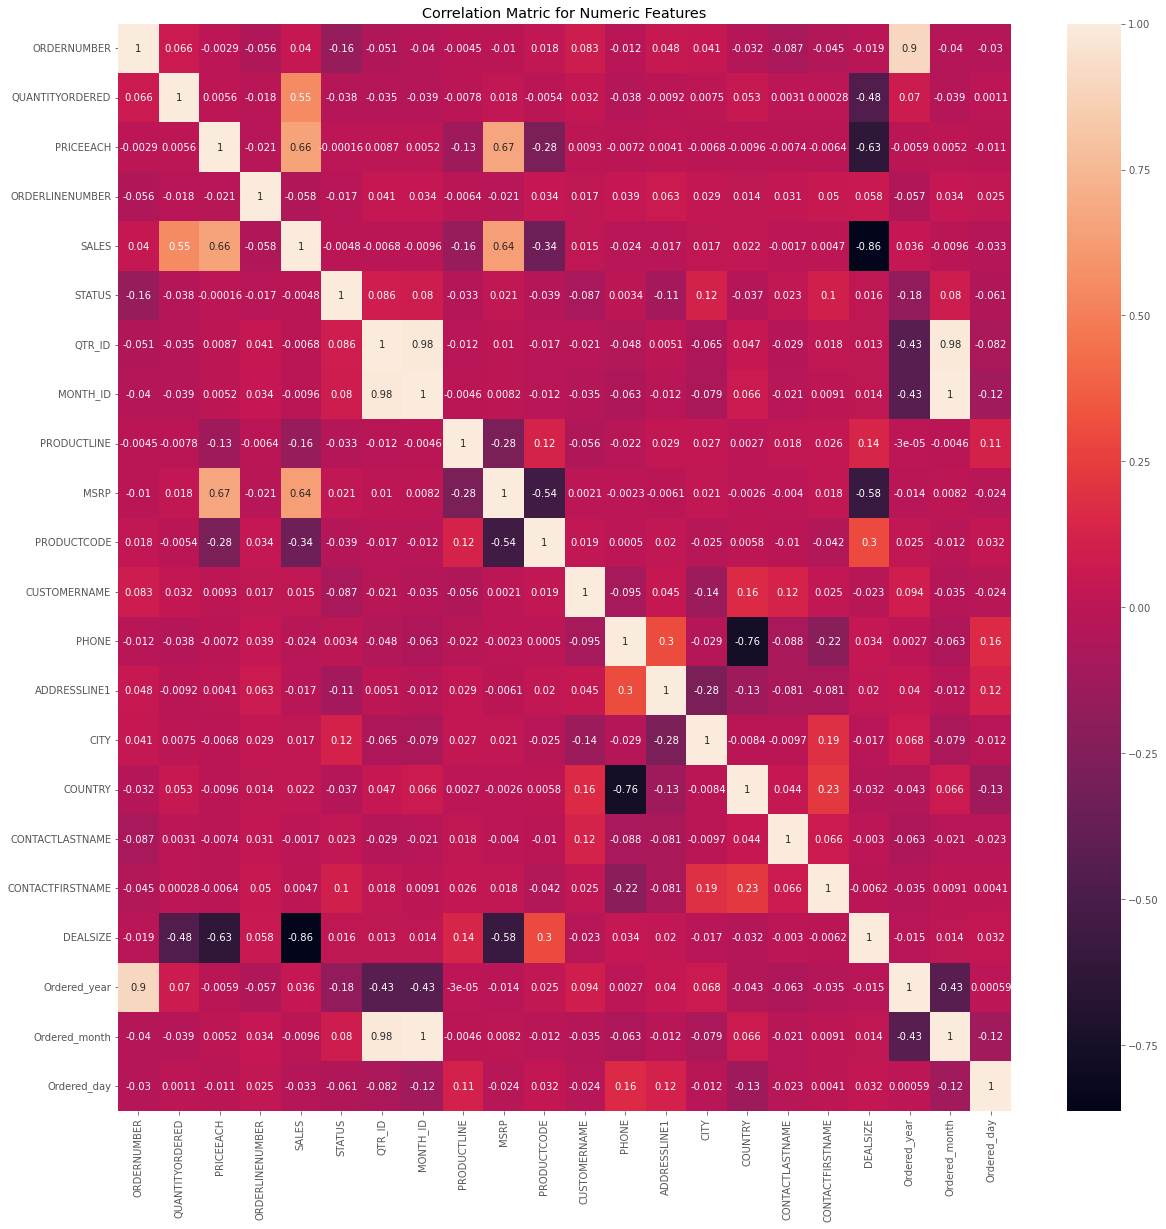

In [13]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_num.corr(),annot=True)
plt.title('Correlation Matric for Numeric Features')